<a href="https://colab.research.google.com/github/Joniald/Colaboratory/blob/main/neural_network_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary classification

In [1]:
from sklearn.datasets import make_circles

In [2]:
n_samples = 1000
x, y = make_circles(n_samples=n_samples, noise=0.05, random_state=42)

(1000,) (1000,)


Text(0, 0.5, 'y')

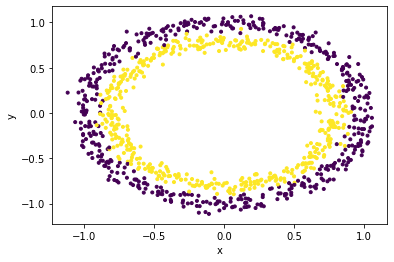

In [3]:
import matplotlib.pyplot as plt
print(x[:,0].shape, y.shape)
plt.scatter(x[:,0], x[:,1], marker='.', c=y)
plt.xlabel('x')
plt.ylabel('y')

In [4]:
import tensorflow as tf

In [5]:
X_train = x[:800]
X_test = x[800:]
Y_train = y[:800]
Y_test = y[800:]
X_train.shape, Y_train.shape

((800, 2), (800,))

In [6]:
tf.random.set_seed(42)

model_01 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_01.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['accuracy']
) 

history = model_01.fit(X_train, Y_train, epochs=50)
 

Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.6951 - accuracy: 0.4762
Epoch 2/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.6137
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.6162
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6322 - accuracy: 0.7375
Epoch 5/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6039 - accuracy: 0.7225
Epoch 6/50
25/25 [==============================] - 0s 1ms/step - loss: 0.5654 - accuracy: 0.8575
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.8938
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4928 - accuracy: 0.8687
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.9187
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.9488
Epoch 11/50
25/25 [

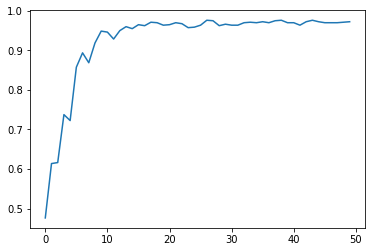

In [7]:
plt.plot(history.epoch, history.history['accuracy'])

In [8]:
model_01.evaluate(X_test,Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0910 - accuracy: 0.9700


[0.09100690484046936, 0.9700000286102295]

(200, 1) (200,)
tf.Tensor([1. 1. 1. 1. 0. 0. 1. 0. 1. 0.], shape=(10,), dtype=float32) [1 1 1 1 0 0 1 0 1 0]


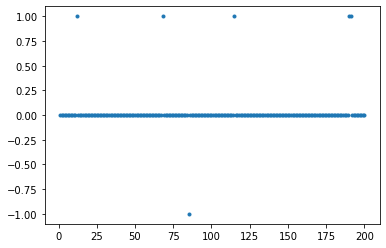

In [9]:
import numpy as np
Y_predict = model_01.predict(X_test)
print(Y_predict.shape, Y_test.shape)
Y_predict = tf.math.round(tf.squeeze(Y_predict, axis=-1))
print(Y_predict[:10], Y_test[:10])
plt.scatter(np.arange(1,201), Y_predict - Y_test, marker='.')

(100,) (100,) (10000, 1) (100, 100) (100, 100) (10000, 2) (100, 100)


Text(0, 0.5, 'y')

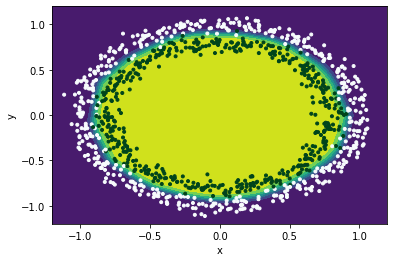

In [10]:
x1 = np.linspace(-1.2, 1.2, 100)
y1 = np.linspace(-1.2, 1.2, 100)
xx, yy = np.meshgrid(x1, y1)
zz = np.c_[xx.ravel(), yy.ravel()]
z1 = model_01.predict(zz)
zzz = tf.reshape(z1,(100,100))
print(x1.shape, y1.shape, z1.shape, xx.shape, yy.shape, zz.shape, zzz.shape)

plt.contourf(x1, y1, zzz)

plt.scatter(x[:,0], x[:,1], marker='.', c=y, cmap=plt.cm.BuGn)
plt.xlabel('x')
plt.ylabel('y')

In [11]:
model_02 = tf.keras.Sequential([
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dense(50, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')                          
])

model_02.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
    optimizer = tf.keras.optimizers.Adam()
)

def scedule(epoch, learning_rate):
  if epoch<10:
    return learning_rate
  else:
    return learning_rate*tf.math.exp(-0.001)  

callback_00 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=30)
#callback_01 = tf.keras.callbacks.LearningRateScheduler(scedule)
callback_01 = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.01*(10/(epoch+1)))
history = model_02.fit(X_train,Y_train, epochs=250, callbacks=[callback_00,callback_01])

Epoch 1/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6961 - binary_accuracy: 0.5663
Epoch 2/250
25/25 [==============================] - 0s 2ms/step - loss: 0.3946 - binary_accuracy: 0.8788
Epoch 3/250
25/25 [==============================] - 0s 2ms/step - loss: 0.1909 - binary_accuracy: 0.9262
Epoch 4/250
25/25 [==============================] - 0s 2ms/step - loss: 0.1348 - binary_accuracy: 0.9438
Epoch 5/250
25/25 [==============================] - 0s 2ms/step - loss: 0.1067 - binary_accuracy: 0.9613
Epoch 6/250
25/25 [==============================] - 0s 2ms/step - loss: 0.1173 - binary_accuracy: 0.9513
Epoch 7/250
25/25 [==============================] - 0s 2ms/step - loss: 0.0864 - binary_accuracy: 0.9663
Epoch 8/250
25/25 [==============================] - 0s 2ms/step - loss: 0.0859 - binary_accuracy: 0.9650
Epoch 9/250
25/25 [==============================] - 0s 1ms/step - loss: 0.0709 - binary_accuracy: 0.9700
Epoch 10/250
25/25 [==========================

In [12]:
modelEvaluate = model_02.evaluate(X_test,Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0850 - binary_accuracy: 0.9750


Index(['loss', 'binary_accuracy', 'lr'], dtype='object')


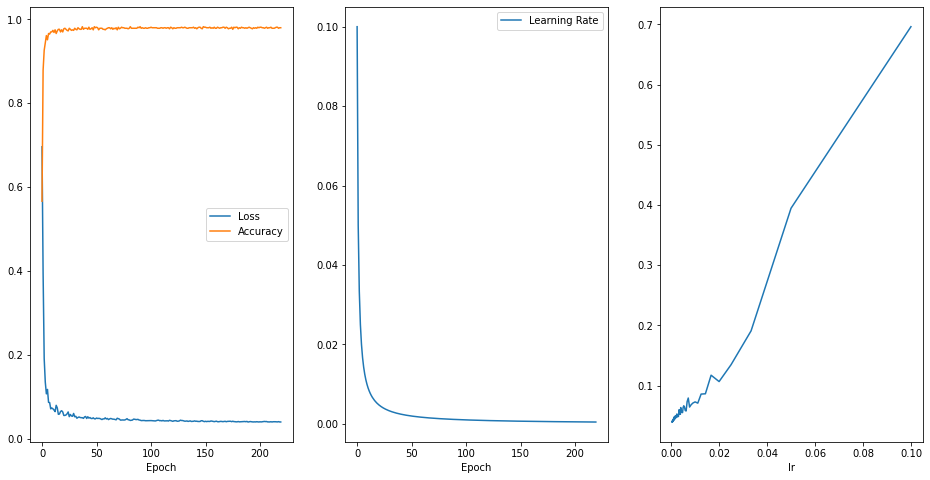

In [13]:
import pandas as pd
plt.figure(figsize=(16,8))


legends = ['Loss', 'Accuracy', 'lr']
histor = pd.DataFrame(history.history)
print(histor.columns)
plt.subplot(1,3,1)
plt.plot(histor.loss, label='Loss')
plt.plot(histor.binary_accuracy, label="Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.subplot(1,3,2)
plt.plot(histor.lr, label="Learning Rate")
plt.legend()
plt.xlabel("Epoch")
plt.subplot(1,3,3)
plt.plot(histor.lr,histor.loss)
plt.xlabel("lr")
plt.show()


(100,) (100,) (10000, 1) (100, 100) (100, 100) (10000, 2) (100, 100)


Text(0, 0.5, 'y')

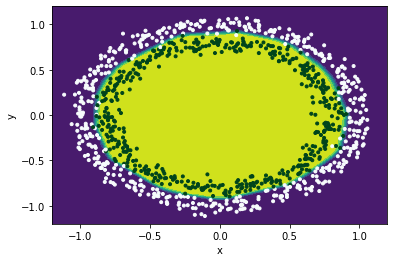

In [14]:
x1 = np.linspace(-1.2, 1.2, 100)
y1 = np.linspace(-1.2, 1.2, 100)
xx, yy = np.meshgrid(x1, y1)
zz = np.c_[xx.ravel(), yy.ravel()]
z1 = model_02.predict(zz)
zzz = tf.reshape(z1,(100,100))
print(x1.shape, y1.shape, z1.shape, xx.shape, yy.shape, zz.shape, zzz.shape)

plt.contourf(x1, y1, zzz)

plt.scatter(x[:,0], x[:,1], marker='.', c=y, cmap=plt.cm.BuGn)
plt.xlabel('x')
plt.ylabel('y')

In [27]:
X_predict = model_02.predict(X_test)

In [28]:
print(X_predict.shape, Y_test.shape)
X_pred = tf.round(tf.squeeze(X_predict, axis=-1))
print(X_pred.shape)

(200, 1) (200,)
(200,)


In [20]:
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix

In [29]:
print("Recall:", recall_score(Y_test,Y_predict))
print("Precision:", precision_score(Y_test,Y_predict))
print("F1-Score:", f1_score(Y_test,Y_predict))
print("Confusion Matrix:", confusion_matrix(Y_test,Y_predict))

Recall: 0.98989898989899
Precision: 0.9514563106796117
F1-Score: 0.9702970297029703
Confusion Matrix: [[96  5]
 [ 1 98]]
